In [ ]:
# Install necessary libraries
!pip install nltk spacy gensim pyldavis scikit-learn matplotlib fasttext

import nltk
import spacy
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset (using a smaller subset to speed up processing)
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = data.data[:1000]  # Use a smaller subset for faster processing


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Text preprocessing
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

preprocessed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and corpus for LDA
texts = [doc for doc in preprocessed_docs]  # Directly use tokens for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Topic modeling with LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)  # Reduce passes for speed
topics = lda_model.print_topics(num_words=5)

print("LDA Topics:")
for topic in topics:
    print(topic)

# Visualize LDA topics with pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Topics:
(0, '0.030*"\n" + 0.029*"   " + 0.028*"1" + 0.021*"=" + 0.020*"\n    "')
(1, '0.015*"\n  " + 0.013*"\n" + 0.010*"\n    " + 0.007*"\n\n" + 0.007*" "')
(2, '0.071*"\n" + 0.067*" " + 0.016*"\n\n" + 0.011*"  " + 0.010*"\n "')
(3, '0.115*"\n" + 0.060*"=" + 0.025*">" + 0.023*" " + 0.013*"<"')
(4, '0.108*"\n" + 0.036*" " + 0.027*"\n\n" + 0.004*"know" + 0.004*"\n\n\n"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                            document  cluster
0  I was wondering if anyone out there could enli...        2
1  A fair number of brave souls who upgraded thei...        2
2  well folks, my mac plus finally gave up the gh...        2
3  \nDo you have Weitek's address/phone number?  ...        0
4  From article <C5owCB.n3p@world.std.com>, by to...        1


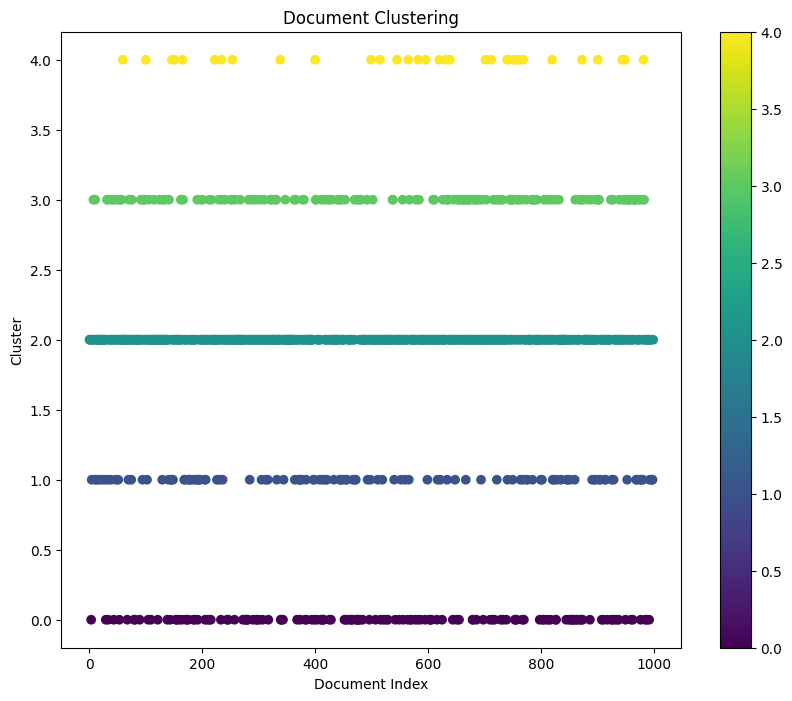

In [ ]:
# Generate document vectors using LDA topic distributions
lda_topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]

# Ensure all document vectors have the same length
num_topics = lda_model.num_topics
lda_vectors = np.zeros((len(lda_topic_distributions), num_topics))

for i, doc_topics in enumerate(lda_topic_distributions):
    for topic_id, topic_prob in doc_topics:
        lda_vectors[i, topic_id] = topic_prob

# Calculate cosine similarity
similarity_matrix = cosine_similarity(lda_vectors)

# Cluster the documents (example using KMeans clustering)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=100)  # Reduced n_init for speed
kmeans.fit(lda_vectors)
clusters = kmeans.labels_

# Add clusters to DataFrame for analysis
df = pd.DataFrame({
    'document': documents,
    'cluster': clusters
})

# Display the first few rows of the DataFrame
print(df.head())

# Visualize clustering results
plt.figure(figsize=(10, 8))
plt.scatter(range(len(clusters)), clusters, c=clusters, cmap='viridis')
plt.xlabel('Document Index')
plt.ylabel('Cluster')
plt.title('Document Clustering')
plt.colorbar()
plt.show()